<a href="https://colab.research.google.com/github/NikosMav/Data-Viz-Course/blob/main/Programming-Assignment-2/facebook_graph_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [19]:
G1 = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Data Visualization/Assignment 2/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [5]:
#Quick snapshot of the Network
print(nx.info(G1))

Graph with 4039 nodes and 88234 edges


# Betweenness Centrality and Communities

In [ ]:
#Create network layout for visualizations
pos = nx.spring_layout(G1)

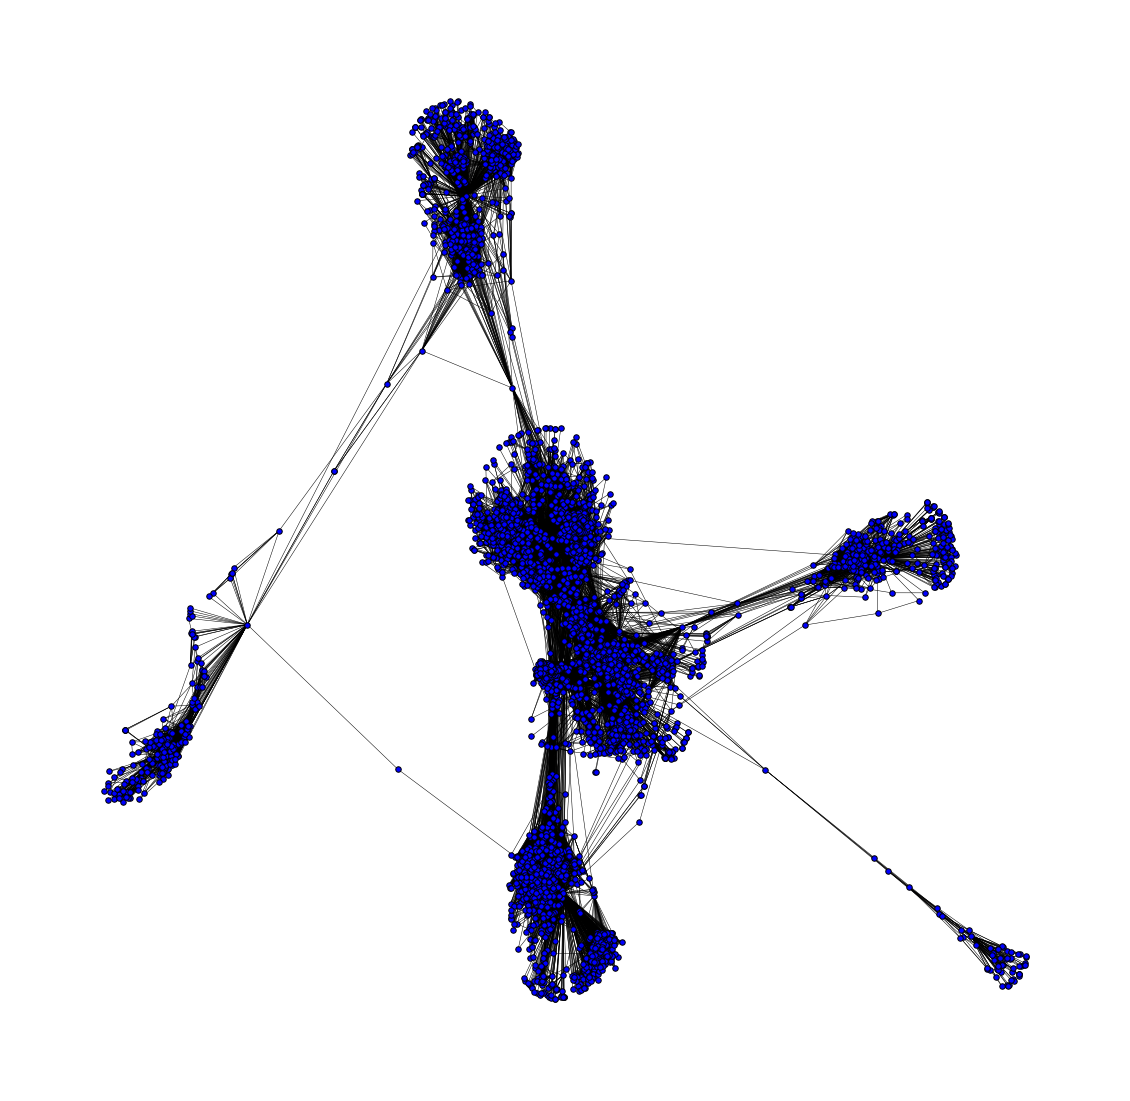

In [10]:
# Using normal networkx
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.margins(tight=True)
nodes = nx.draw_networkx_nodes(G1, pos, node_size=30, node_color='blue')
nodes.set_edgecolor('black')
nodes.set_linewidth(1.0)
edges = nx.draw_networkx_edges(G1, pos, edge_color='black')
edges.set_linewidth(0.5)
plt.show()

[107, 1684, 3437, 1912, 1085]

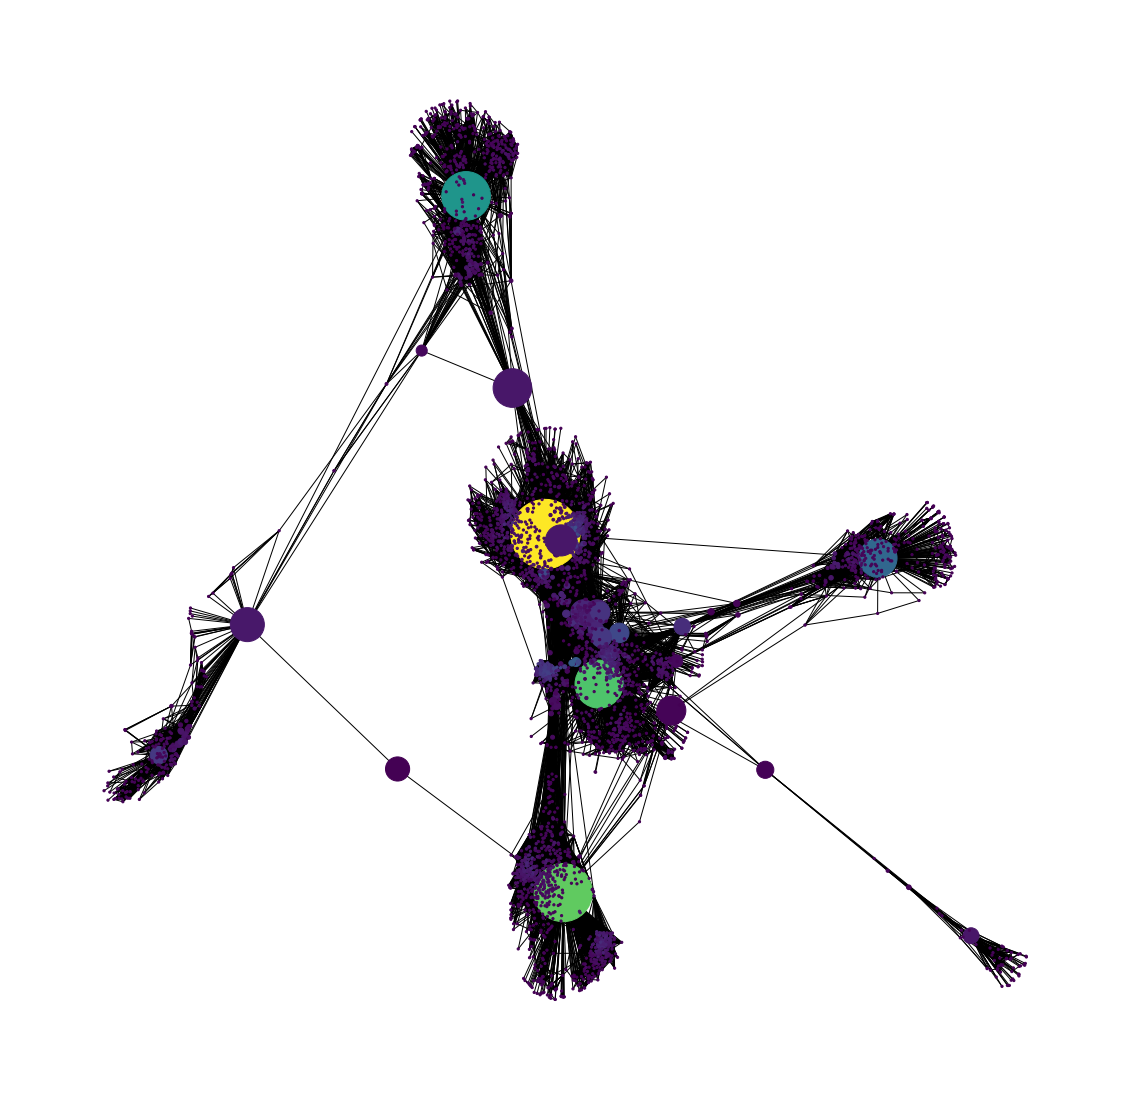

In [12]:
# Betweenness Centrality
betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in betCent.values()]

plt.figure(figsize=(20,20))

nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

In [27]:
coms = community_louvain.best_partition(G1)
size = float(len(set(coms.values())))
print("community count:", size)
mode = community.modularity(coms, G1)
print("modularity:", mode)

count = 0.
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.margins(tight=True)
for com in set(coms.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in coms.keys() if coms[nodes] == com]
    values = [ (count / size) for nodes in list_nodes]
    nodes = nx.draw_networkx_nodes(G1, 
                                   pos,
                                   list_nodes,
                                   cmap=plt.get_cmap('rainbow'),
                                   with_labels=False,
                                   node_size = 30,
                                   node_color = values,
                                   vmin=0.0, vmax=1.0)
    nodes.set_edgecolor('black')
    nodes.set_linewidth(1.0)

edges = nx.draw_networkx_edges(G1, pos)
edges.set_linewidth(0.5)
plt.show()

community count: 16.0


AttributeError: ignored